In [1]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import math

%matplotlib inline

In [2]:
toNodes = range(3, 5)
fromNodes = range(0, 2)

In [3]:
bias       = [0.2, -0.1, 0.5, 0.1, 0.4, 0.9]
activation = [0.8, -0.3, -0.8, 0.1, 0.5]
netInput   = [0, 0, 0, 0, 0]
weight = [[ 0.1, -0.8], 
          [-0.3,  0.1], 
          [ 0.2, -0.1], 
          [ 0.0,  0.1], 
          [ 0.8, -0.8], 
          [ 0.4, 0.5]]

In [4]:
for i in toNodes:
    netInput[i] = bias[i]
    for j in fromNodes:
        netInput[i] += (weight[i][j] * activation[j]) 
netInput

[0, 0, 0, 0.07, 1.28]

In [5]:
def activationFunction(netInput):
    return 1.0 / (1.0 + math.exp(-netInput))

In [6]:
for i in toNodes:
    activation[i] = activationFunction(netInput[i])
activation

[0.8, -0.3, -0.8, 0.5174928576663897, 0.7824497764231124]

In [7]:
xs = range(-10, 10)
pts = [activationFunction(x) for x in xs]

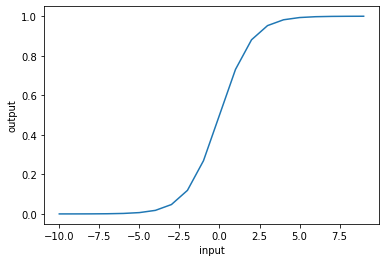

In [8]:
plt.plot(xs, pts)
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [9]:
desiredOutput = [0.1, 0.2, 0.3, 0.4, 0.5]
actualOutput = [0.8, 0.6, 0.5, 0.8, 0.3]

error = [0.0 for i in desiredOutput]
delta = [0.0 for i in desiredOutput]

EPSILON = 0.1   # learning rate
MOMENTUM = 0.01 # a smoothing term

weightUpdate = [[ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0]]

In [10]:
for i in toNodes:
    error[i] = (desiredOutput[i] - actualOutput[i])
    delta[i] = error[i] * actualOutput[i] * (1 - actualOutput[i])
    for j in fromNodes:
        weightUpdate[i][j] = (EPSILON * delta[i] * actualOutput[j]) + (MOMENTUM * weightUpdate[i][j])
        
weightUpdate

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.00512, -0.00384],
 [0.00336, 0.0025199999999999997],
 [0.0, 0.0]]

In [11]:
from calysto.ai.conx import *

ModuleNotFoundError: No module named 'calysto'

In [ ]:
net = Network()
net.addLayers(2, 3, 1)
net

In [ ]:
net.propagate(input=[0, 0])

In [ ]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

In [ ]:
# provide training patterns (inputs and outputs)
net.setInputs([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
net.setOutputs([[0.0],[0.0],[0.0],[1.0]])

# set learning parameters
net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

# learn
net.train()

In [ ]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

In [ ]:
net.propagate(input=[0.8, 0.8])

In [ ]:
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()